In [1]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

In [20]:
#DataSet 
x,y=make_regression(n_samples=100,n_features=1,noise=10) #n_samples=nombre de ligne , n_features = nb de variable 
y=y+ abs(y/2)


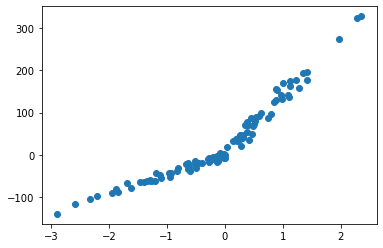

In [21]:
plt.scatter(x,y)

In [22]:
#verifie le matrice
x.shape

(100, 1)

In [23]:
y.shape

(100,)

In [24]:
y=y.reshape(y.shape[0],1)
y.shape

(100, 1)

In [28]:
#matrice
X=np.hstack((x,np.ones(x.shape))) # hstack :colle ensemble deux vecteurs
X=np.hstack((x**2,X))
X.shape


(100, 3)

In [29]:
theta=np.random.randn(3,1)
theta.shape
theta

array([[ 0.33362839],
       [ 0.8763166 ],
       [-0.30063377]])

Modele F= X.theta

In [30]:
def model(X,theta):
    return X.dot(theta)


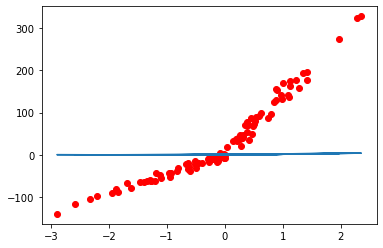

In [31]:
plt.scatter(x,y,c="red")
plt.plot(x,model(X,theta))

Fonction Couts Erreur QUadritique

In [32]:
def cost_function(X,y,theta):
    m=len(y)
    return 1/(2*m)*np.sum((model(X,theta)-y)**2)

In [33]:
cost_function(X,y,theta)

4659.88676137181

Descente de Gradient

In [34]:
def grad(X,y,theta):
    m=len(y)
    return 1/m * X.T.dot(model(X,theta)-y)

In [35]:
def gradient_descent(X,y,theta,learning_rate,n_iteration):
    cost_history=np.zeros(n_iteration)
    for i in range(0,n_iteration):
        theta=theta-learning_rate * grad(X,y,theta)
        cost_history[i]=cost_function(X,y,theta)
    return theta,cost_history

Entrainement de modeles

In [36]:
theta_final,cost_history=gradient_descent(X,y,theta,learning_rate=0.01,n_iteration=1000)
theta_final

array([[18.08803025],
       [94.53364477],
       [19.88778975]])

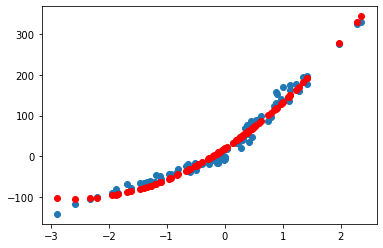

In [40]:
predictions=model(X,theta_final)
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],predictions,c="r")

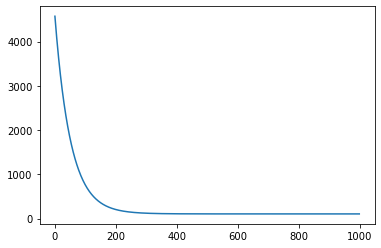

In [41]:
plt.plot(range(1000),cost_history)

Coefficient de determinsation

In [42]:
def coef_determination(y,pred):
    u=((y-pred)**2).sum()
    v=((y-y.mean())**2).sum()
    return 1-u/v

In [43]:
coef_determination(y,predictions)

0.9750590261284371